### Apply the 'gettig started' Turorial to our dataset (aggregation by month)

In [27]:
import pandas as pd
from fbprophet import Prophet

In [28]:
df = pd.read_csv('../../data/cleaned/monthseries_04_17.csv')
df.rename({'acc_nr':'y'}, axis=1, inplace=True)
len(df), df.head(), df.tail()

(168,            ds     y
 0  2004-01-31  1168
 1  2004-02-29  1028
 2  2004-03-31  1191
 3  2004-04-30  1223
 4  2004-05-31  1284,              ds     y
 163  2017-08-31   971
 164  2017-09-30  1046
 165  2017-10-31  1109
 166  2017-11-30  1053
 167  2017-12-31  1063)

In [14]:
m = Prophet() #yearly_seasonality=10) #daily_seasonality=True) #, weekly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(df)
# m.train_holiday_names

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods=12,freq='M',include_history=False)
future.head(2)

,ds
0,2018-01-31
1,2018-02-28


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7,2018-08-31,1087.644130,1003.471479,1171.678535
8,2018-09-30,1068.466470,990.310399,1150.178986
9,2018-10-31,1173.480169,1102.387283,1253.121372
10,2018-11-30,1115.475446,1034.203559,1191.873864
11,2018-12-31,1054.707304,982.746824,1127.633062


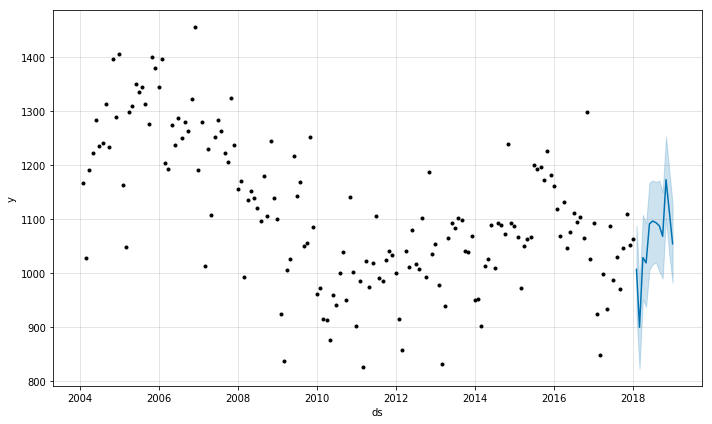

In [17]:
fig1 = m.plot(forecast)

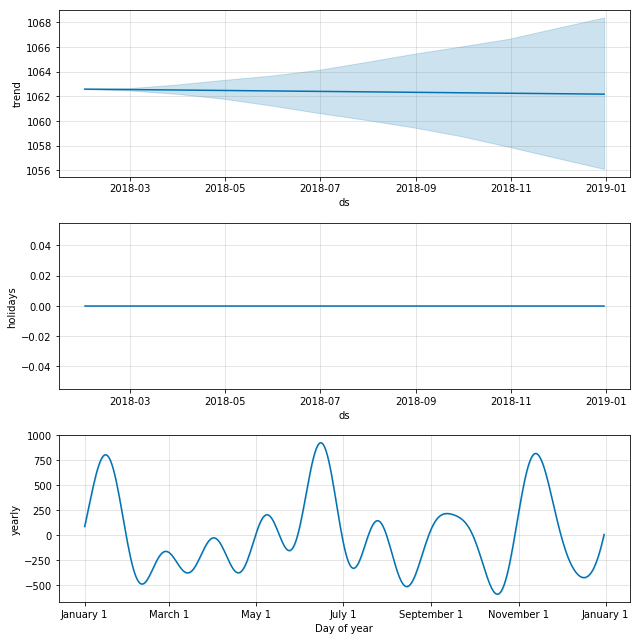

In [18]:
fig2 = m.plot_components(forecast)

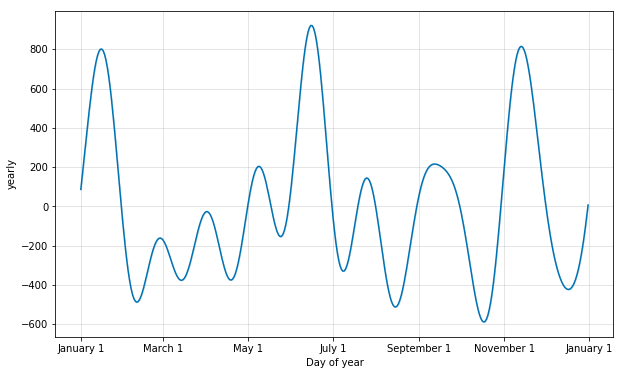

In [19]:
from fbprophet import plot as pl
a = pl.plot_yearly(m)

In [20]:
import matplotlib.pyplot as plt

In [34]:
x = forecast.index.values[:12]
y = forecast['yhat'][:12]
y

0     1007.329420
1      900.222867
2     1029.120585
3     1019.239033
4     1091.595041
5     1096.707969
6     1093.691953
7     1087.644130
8     1068.466470
9     1173.480169
10    1115.475446
11    1054.707304
Name: yhat, dtype: float64

In [35]:
df_act = pd.read_csv('../../data/cleaned/monthseries_18.csv')
yr = df_act.acc_nr.values

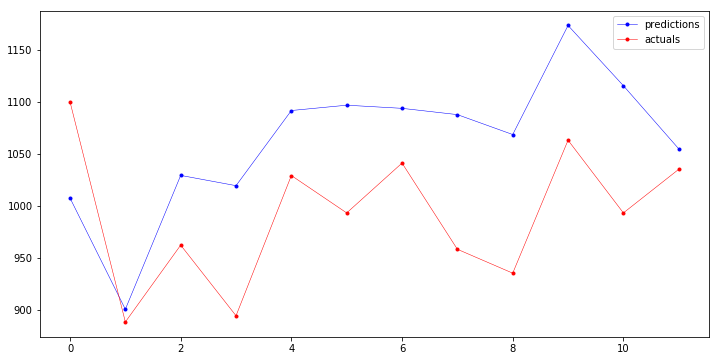

In [36]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b.-', label='predictions', lw=0.5)
ax.plot(x,yr, 'r.-', label='actuals', lw=0.5)
# ax.set_ylim(0,300)
ax.legend()

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,yr)

9049.377240378439

In [38]:
y_base=[yr.mean()]*len(yr)
mean_squared_error(y_base,yr)

4003.07638888889

#### Smooth out actuals (rolling window)

In [97]:
df_act.set_index('ds', inplace=True)

In [98]:
rolling = df_act.rolling(5, center=True)

mean = rolling.mean()

ym = mean.acc_nr.values

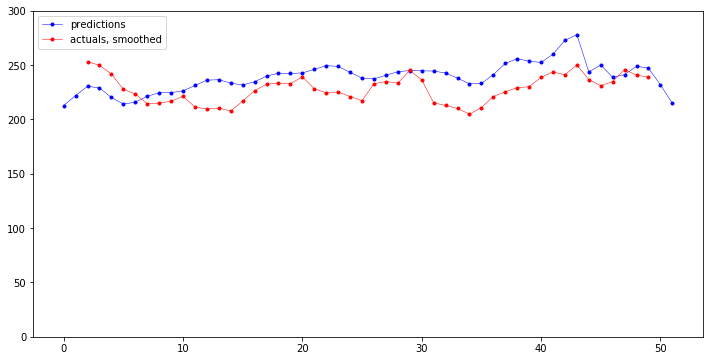

In [99]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b.-', label='predictions', lw=0.5)
ax.plot(x,ym, 'r.-', label='actuals, smoothed', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [83]:
mean_squared_error(y[pd.notnull(ym)],ym[pd.notnull(ym)])

342.9241824867493

#### Smooth out both actuals and predictions

In [94]:
fc_ds = forecast[['ds','yhat']][:52]
fc_ds.set_index('ds', inplace=True)

In [95]:
rolling_fc = fc_ds.rolling(5, center=True)
mean_fc = rolling_fc.mean()
yfcm = mean_fc.yhat.values

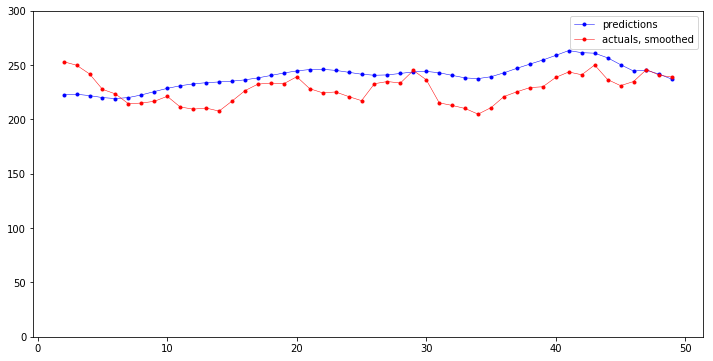

In [100]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,yfcm, 'b.-', label='predictions', lw=0.5)
ax.plot(x,ym, 'r.-', label='actuals, smoothed', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [101]:
mean_squared_error(yfcm[pd.notnull(ym)],ym[pd.notnull(ym)])

334.5845681011313

However, the mean is a better predictor:

In [17]:
ym[pd.notnull(ym)].mean()

NameError: name 'ym' is not defined

In [109]:
ys = [ym[pd.notnull(ym)].mean()]*len(ym[pd.notnull(ym)])

In [110]:
mean_squared_error(ys,ym[pd.notnull(ym)])

156.31692708333333